In [16]:
import networkx as nx
import numpy as np
from IPython.core.pylabtools import figsize
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.xkcd()
%matplotlib inline

In [4]:
G = nx.karate_club_graph()
label_list = [d['club'] for n, d in G.nodes(data = True)]
club_dict = {club:i for i, club in enumerate(set(label_list))}
label_array = np.array([club_dict[club] for club in label_list], dtype = float)
pos = nx.spring_layout(G)

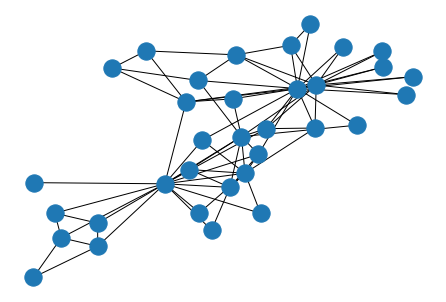

In [17]:
nx.draw(G)

In [18]:
def label_spread_laplacian(G, masked_label, mask_size, labeled_size, plot = True, pos = None):
  masked_label = np.sign(masked_label - .5)
  masked_label[np.isnan(masked_label)] = 0
  
  A = nx.to_numpy_array(G)
  D = A.sum(axis = 1).reshape((-1,1))
  L = D - A

  # attention that the 'np.linalg.eig'.
  eigen_values, eigen_vectors = np.linalg.eig(L)
  sorted_eigen_value_index = np.argsort(eigen_values)
  E = eigen_vectors[:,sorted_eigen_value_index[:labeled_size]].real

  lr = LinearRegression()
  lr.fit(E,masked_label)
  coefs = lr.coef_.reshape(-1,1)
  preds = np.sign(np.dot(coefs.T,E.T))[0]

  if plot:
    nx.draw(G, node_color=preds, cmap=plt.get_cmap('Set2'), node_size=800, with_labels=True, pos=pos)

  return preds

In [19]:
mask_size = 28
labeled_size = len(G.nodes()) - mask_size
mask_pos = np.random.choice(np.arange(len(label_array)), size=mask_size, replace=False)
masked_label = label_array.copy()
masked_label[mask_pos] = np.nan

<ipython-input-18-6194495ba747>:2: RuntimeWarning: invalid value encountered in sign
  masked_label = np.sign(masked_label - .5)


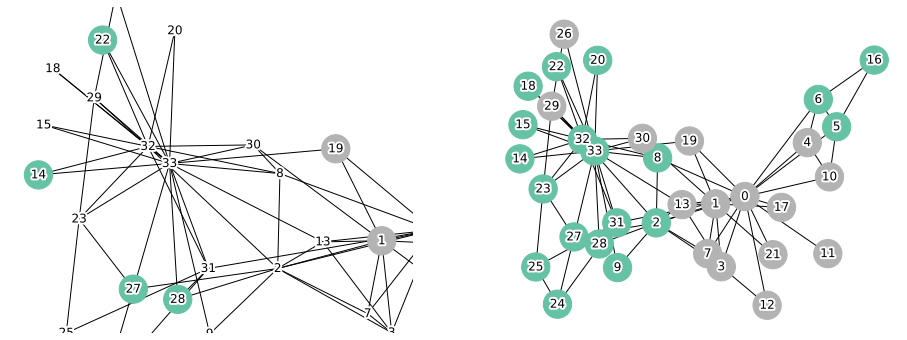

In [20]:
figsize(16,6)

plt.subplot(1,2,1)
#nx.draw(G)
nx.draw(G, node_color=masked_label, cmap=plt.get_cmap('Set2'), node_size=800, with_labels=True, pos=pos)
plt.subplot(1,2,2)
_ = label_spread_laplacian(G, masked_label, mask_size, labeled_size, plot = True, pos = pos)